![image.png](attachment:image.png)

# Tarefa I

Neste projeto, estamos construindo um credit scoring para cartão de crédito, em um desenho amostral com 15 safras, e utilizando 12 meses de performance.

Carregue a base de dados ```credit_scoring.ftr```.

In [ ]:
import pandas as pd

df = pd.read_feather('credit_scoring.ftr')
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
0,2015-01-01,5733,F,N,N,0,Empresário,Médio,Solteiro,Casa,43,6.873973,1.0,2515.39,False
1,2015-01-01,727,F,S,S,0,Assalariado,Médio,Casado,Casa,35,4.526027,2.0,3180.19,False
2,2015-01-01,6374,F,N,N,2,Assalariado,Médio,Casado,Casa,31,0.243836,4.0,1582.29,False
3,2015-01-01,9566,F,N,N,0,Assalariado,Médio,Casado,Casa,54,12.772603,2.0,13721.17,False
4,2015-01-01,9502,F,S,N,0,Assalariado,Superior incompleto,Solteiro,Casa,31,8.432877,1.0,2891.08,False


## Amostragem

Separe os três últimos meses como safras de validação *out of time* (oot).

Variáveis:<br>
Considere que a variável ```data_ref``` não é uma variável explicativa, é somente uma variável indicadora da safra, e não deve ser utilizada na modelagem. A variávei ```index``` é um identificador do cliente, e também não deve ser utilizada como covariável (variável explicativa). As restantes podem ser utilizadas para prever a inadimplência, incluindo a renda.


In [ ]:
# Converter data_ref para datetime
df['data_ref'] = pd.to_datetime(df['data_ref'])

# Identificar os últimos três meses
ultimos_meses = df['data_ref'].drop_duplicates().sort_values(ascending=False).head(3)

# Separar conjunto de treino e validação
df_oot = df[df['data_ref'].isin(ultimos_meses)]
df_treino = df[~df['data_ref'].isin(ultimos_meses)]

# Remover variáveis não explicativas
variaveis_explicativas = [col for col in df.columns if col not in ['data_ref', 'index', 'mau']]
df_treino = df_treino[variaveis_explicativas + ['mau']]
df_oot = df_oot[variaveis_explicativas + ['mau']]

# Mostrar os resultados
print("Conjunto de Treino:")
print(df_treino)
print("\nConjunto de Validação (OOT):")
print(df_oot)

Conjunto de Treino:
        qtd_filhos  idade  tempo_emprego  qt_pessoas_residencia     renda  \
0                0   43.0       6.873973                    1.0   2515.39   
1                0   35.0       4.526027                    2.0   3180.19   
2                2   31.0       0.243836                    4.0   1582.29   
3                0   54.0      12.772603                    2.0  13721.17   
4                0   31.0       8.432877                    1.0   2891.08   
...            ...    ...            ...                    ...       ...   
599995           0   47.0      17.272603                    2.0  11009.92   
599996           1   31.0       3.756164                    3.0   4472.60   
599997           0   62.0       6.046575                    2.0   5117.17   
599998           0   40.0      12.939726                    2.0   2885.45   
599999           0   66.0       6.046575                    1.0   3395.65   

        posse_bens  sexo_M  posse_de_veiculo_S  posse_d

## Descritiva básica univariada

- Descreva a base quanto ao número de linhas, número de linhas para cada mês em ```data_ref```.
- Faça uma descritiva básica univariada de cada variável. Considere as naturezas diferentes: qualitativas e quantitativas.

In [ ]:
# Número total de linhas
total_linhas = df.shape[0]

# Número de linhas por mês em data_ref
linhas_por_mes = df['data_ref'].value_counts().sort_index()

# Descrição univariada básica
qualitativas = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'mau']
quantitativas = ['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']

# Análise de variáveis qualitativas
descricao_qualitativas = {}
for col in qualitativas:
    descricao_qualitativas[col] = df[col].value_counts(normalize=True) * 100  # Frequências relativas (%)

# Análise de variáveis quantitativas
descricao_quantitativas = df[quantitativas].describe()

# Resultados
print(f"Total de linhas: {total_linhas}")
print("\nNúmero de linhas por mês em data_ref:")
print(linhas_por_mes)
print("\nDescrição das variáveis qualitativas:")
for col, stats in descricao_qualitativas.items():
    print(f"\n{col}:\n{stats}")
print("\nDescrição das variáveis quantitativas:")
print(descricao_quantitativas)

Total de linhas: 750000

Número de linhas por mês em data_ref:
data_ref
2015-01-01    50000
2015-02-01    50000
2015-03-01    50000
2015-04-01    50000
2015-05-01    50000
2015-06-01    50000
2015-07-01    50000
2015-08-01    50000
2015-09-01    50000
2015-10-01    50000
2015-11-01    50000
2015-12-01    50000
2016-01-01    50000
2016-02-01    50000
2016-03-01    50000
Name: count, dtype: int64

Descrição das variáveis qualitativas:

sexo:
sexo
F    67.277333
M    32.722667
Name: proportion, dtype: float64

posse_de_veiculo:
posse_de_veiculo
N    61.060533
S    38.939467
Name: proportion, dtype: float64

posse_de_imovel:
posse_de_imovel
S    67.158933
N    32.841067
Name: proportion, dtype: float64

tipo_renda:
tipo_renda
Assalariado         51.432000
Empresário          23.028267
Pensionista         16.835333
Servidor público     8.656267
Bolsista             0.048133
Name: proportion, dtype: float64

educacao:
educacao
Médio                  67.578133
Superior completo      27.240800

## Descritiva bivariada

Faça uma análise descritiva bivariada de cada variável

Tabelas de contingência entre variáveis qualitativas:

Relação entre sexo e posse_de_veiculo:
posse_de_veiculo          N          S
sexo                                  
F                 73.532046  26.467954
M                 35.419281  64.580719

Relação entre sexo e posse_de_imovel:
posse_de_imovel          N          S
sexo                                 
F                31.048000  68.952000
M                36.527585  63.472415

Relação entre sexo e tipo_renda:
tipo_renda  Assalariado  Bolsista  Empresário  Pensionista  Servidor público
sexo                                                                        
F             46.651671  0.071545   22.548258    21.407111          9.321416
M             61.260288  0.000000   24.015158     7.435824          7.288730

Relação entre sexo e educacao:
educacao  Fundamental      Médio  Pós graduação  Superior completo  \
sexo                                                                 
F            1.070792  67.812042       0.1171

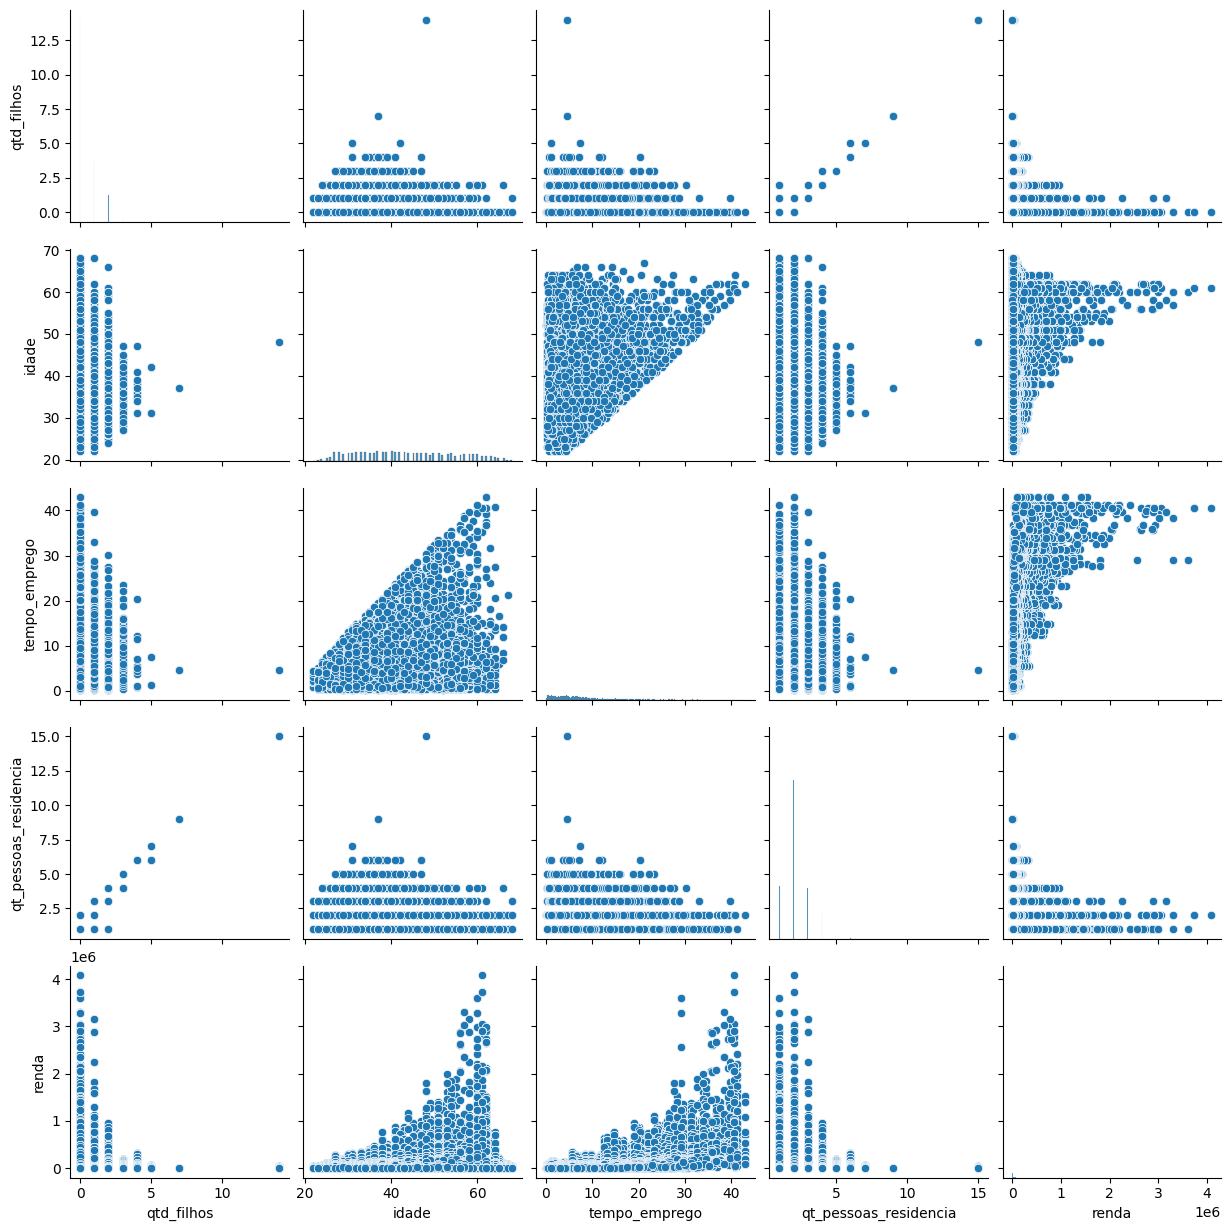


Estatísticas descritivas de variáveis quantitativas agrupadas por variáveis qualitativas:

Agrupando por sexo:
     qtd_filhos                                                   idade  \
          count      mean       std  min  25%  50%  75%   max     count   
sexo                                                                      
F      504580.0  0.373560  0.685245  0.0  0.0  0.0  1.0   7.0  504580.0   
M      245420.0  0.555973  0.826352  0.0  0.0  0.0  1.0  14.0  245420.0   

                 ... qt_pessoas_residencia           renda                \
           mean  ...                   75%   max     count          mean   
sexo             ...                                                       
F     45.498870  ...                   2.0   9.0  504580.0  27151.873602   
M     40.321612  ...                   3.0  15.0  245420.0  15192.796751   

                                                                     
               std     min      25%      50%        75%      

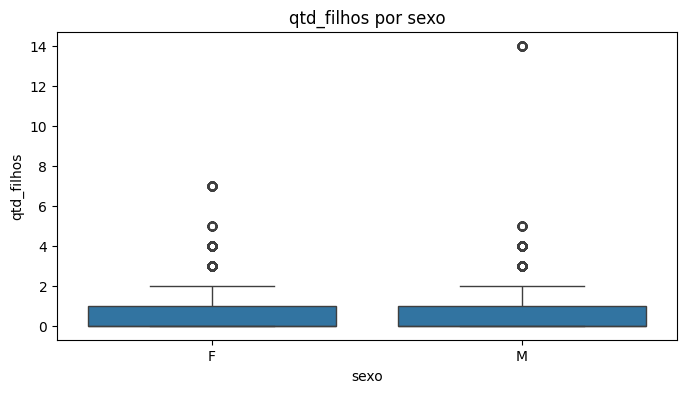

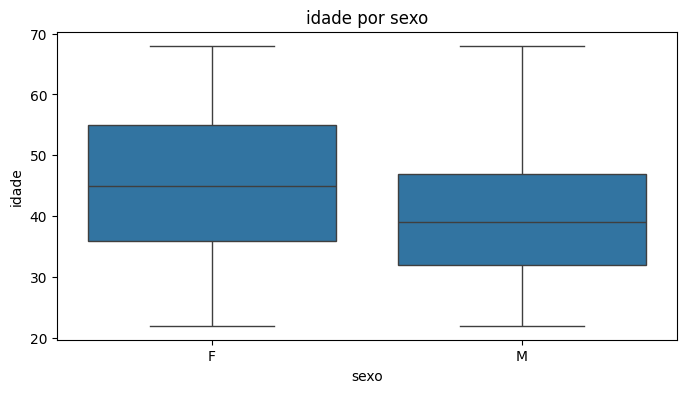

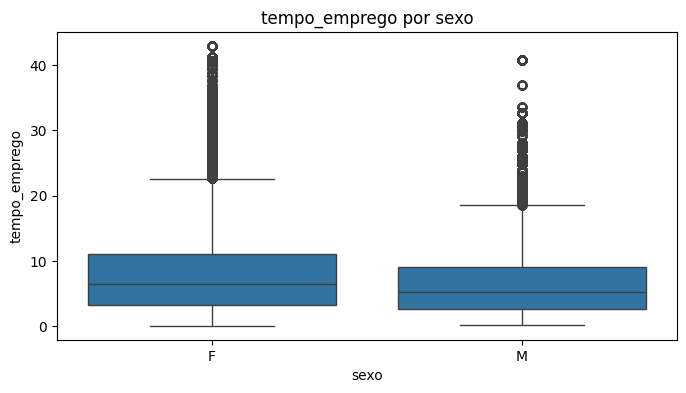

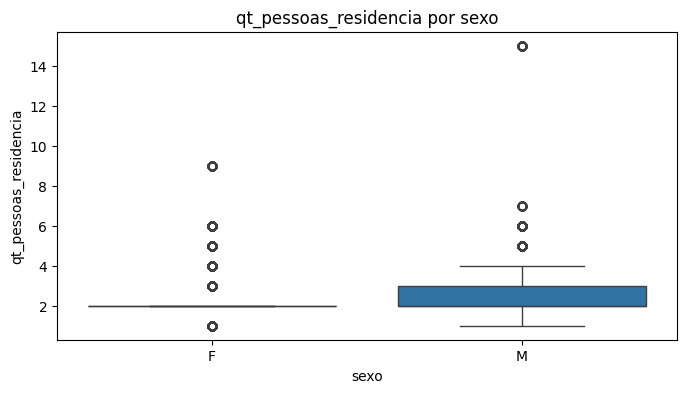

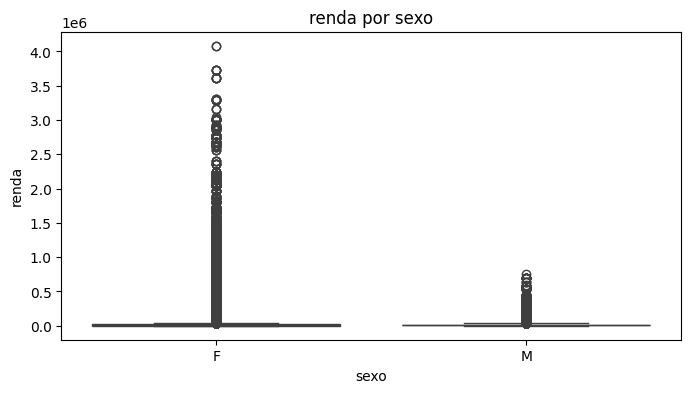

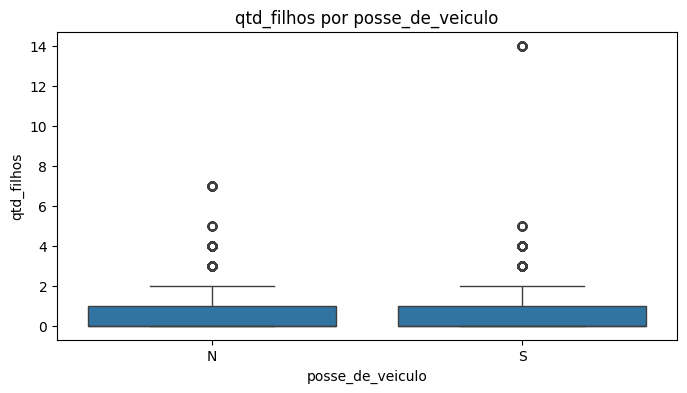

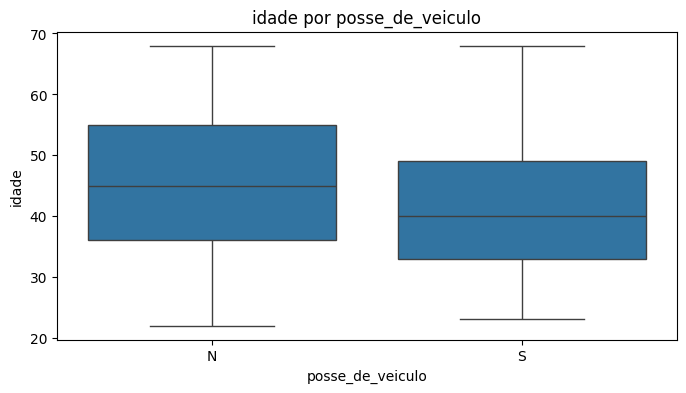

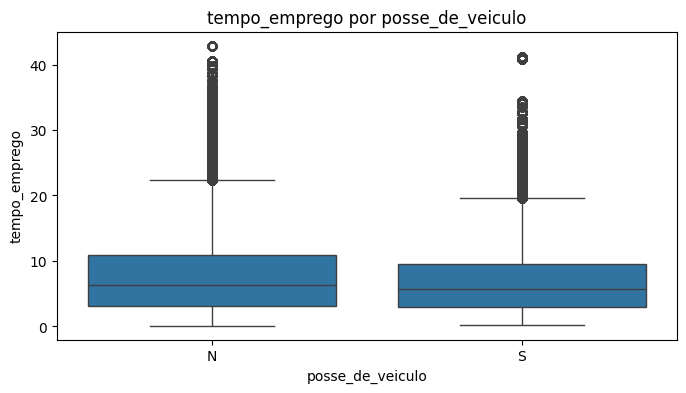

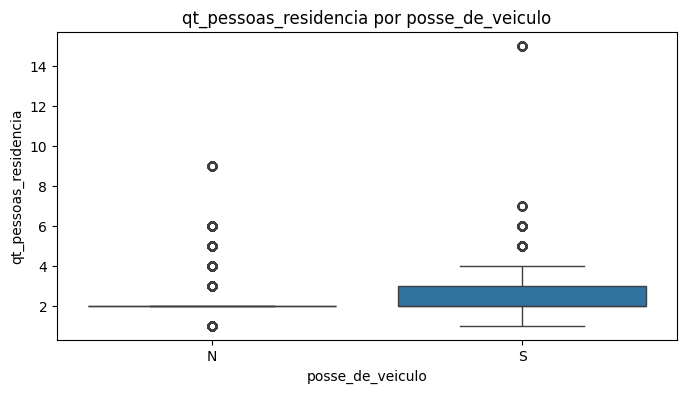

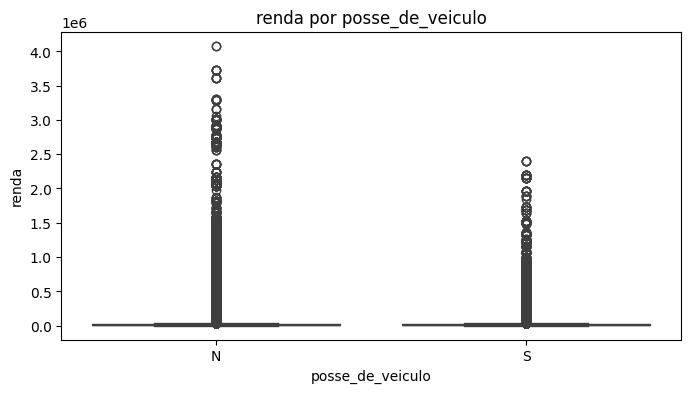

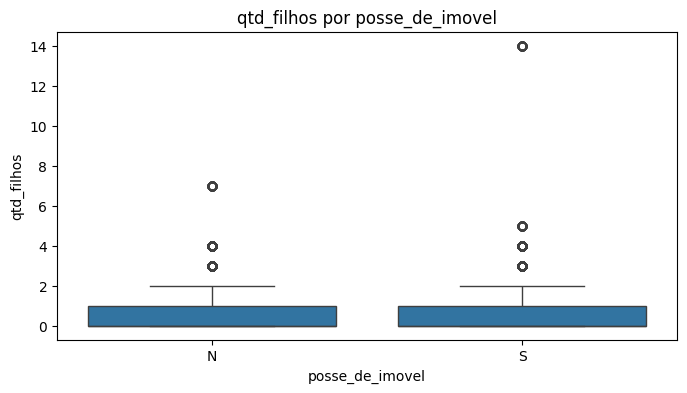

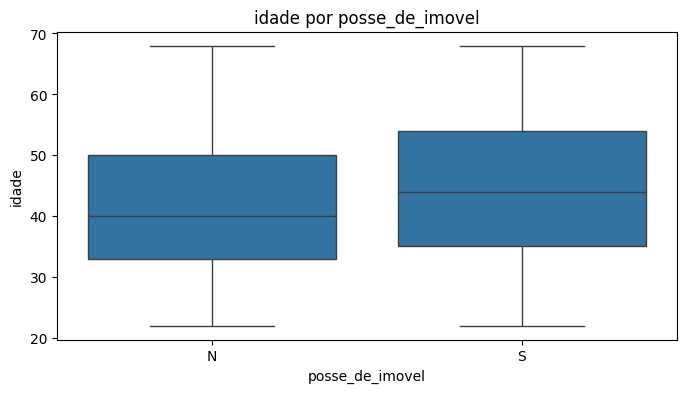

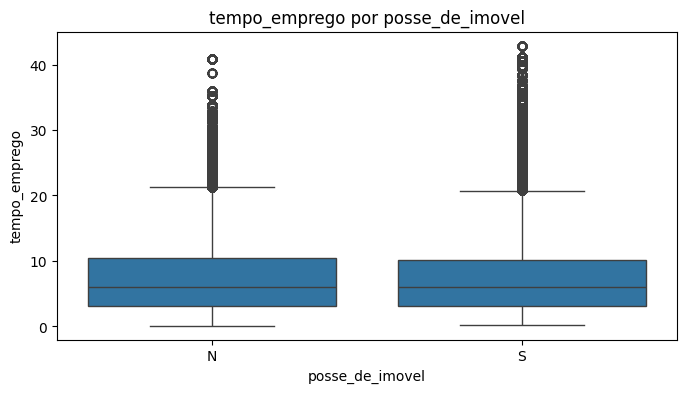

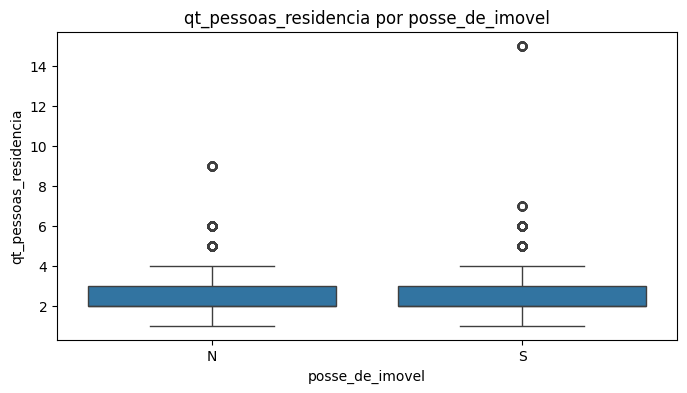

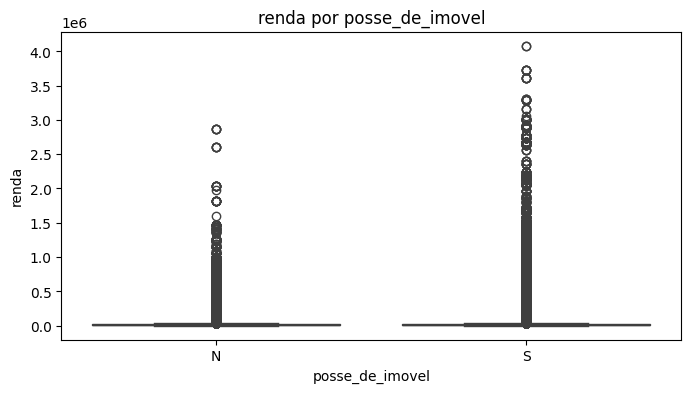

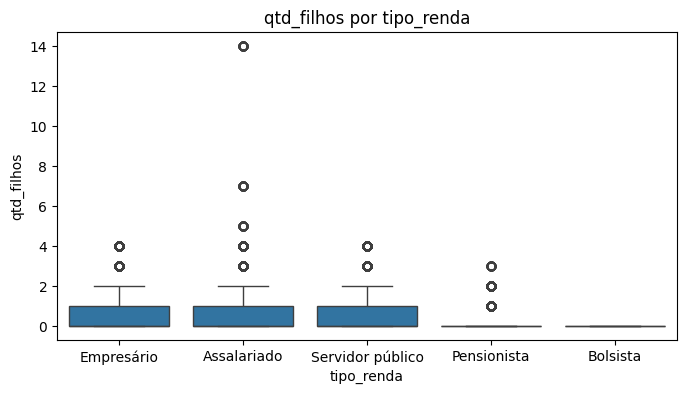

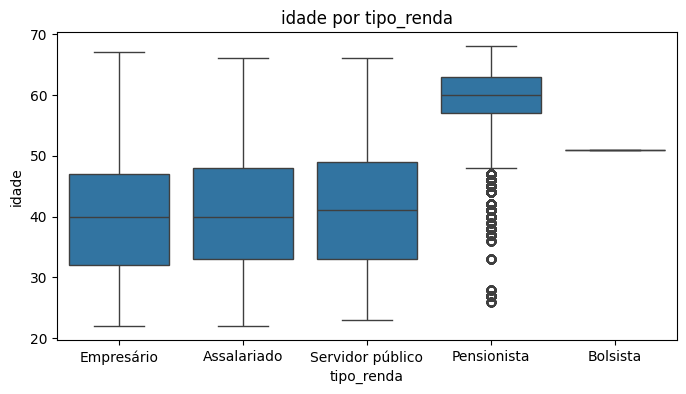

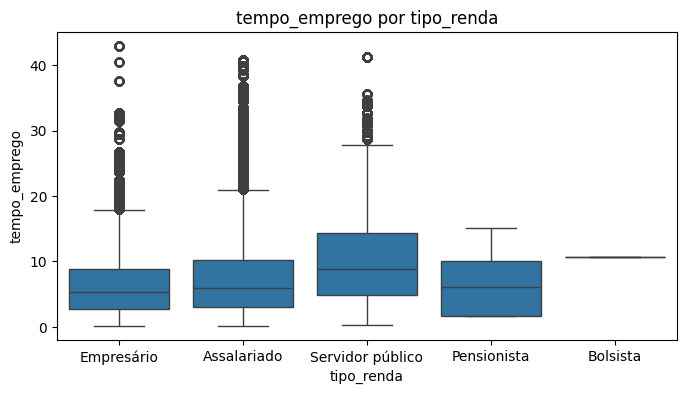

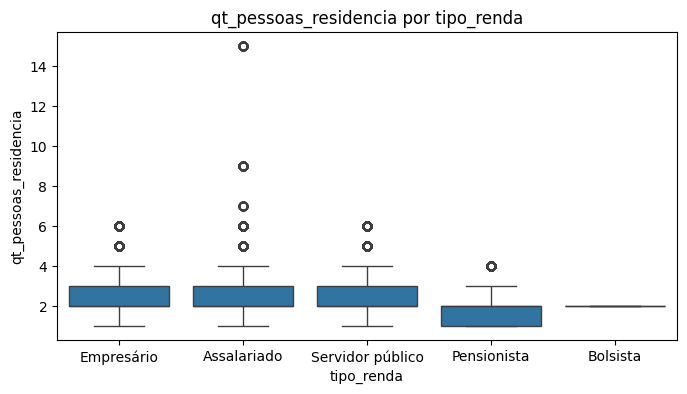

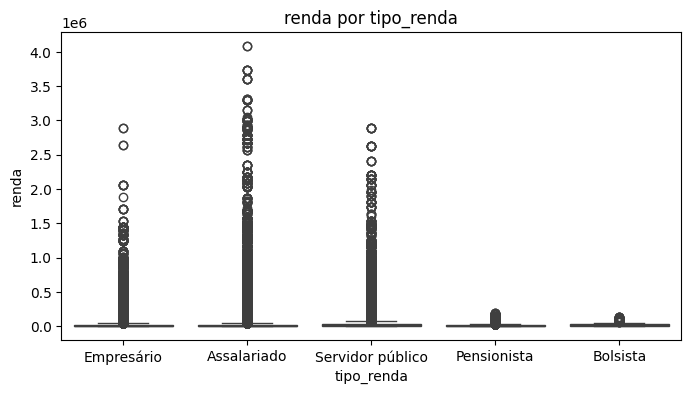

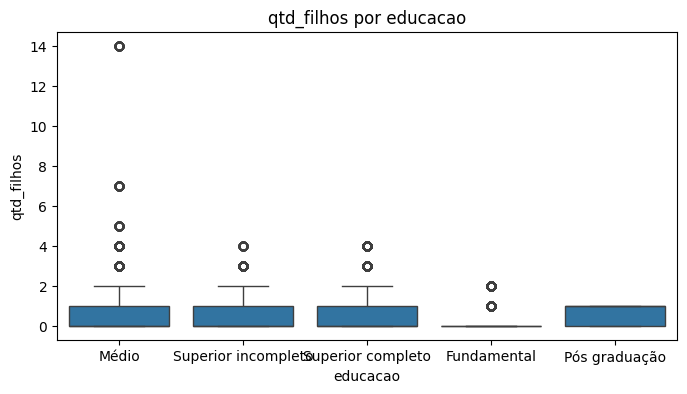

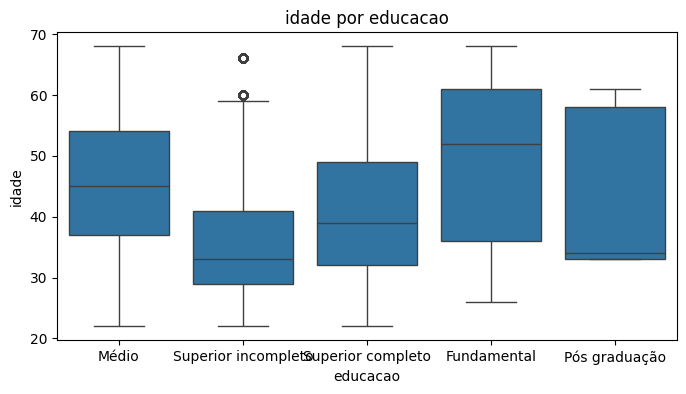

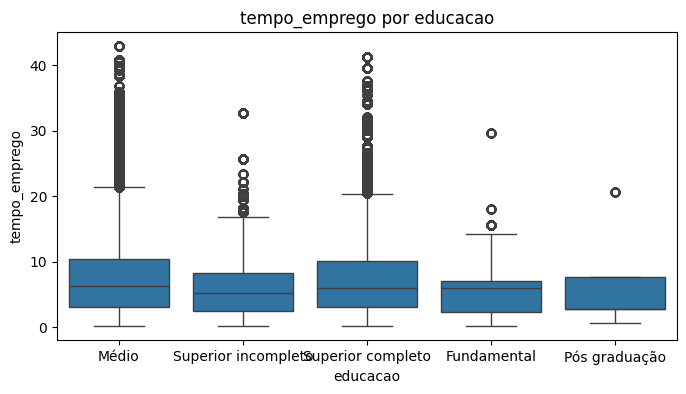

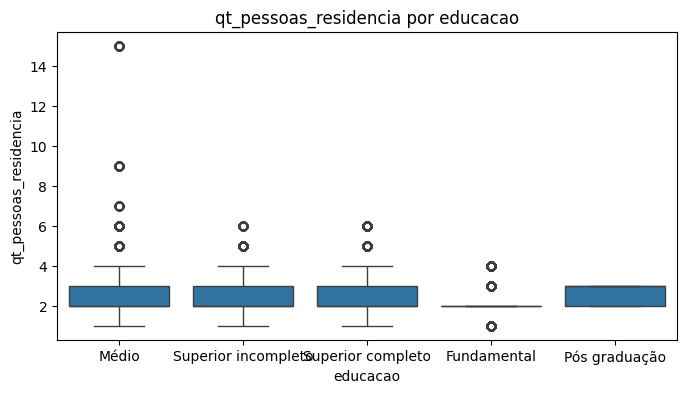

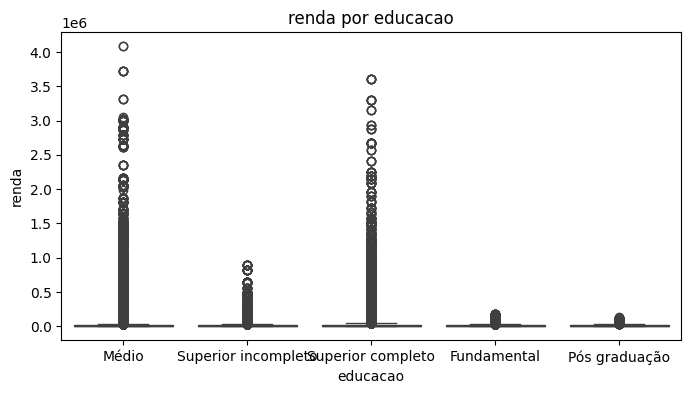

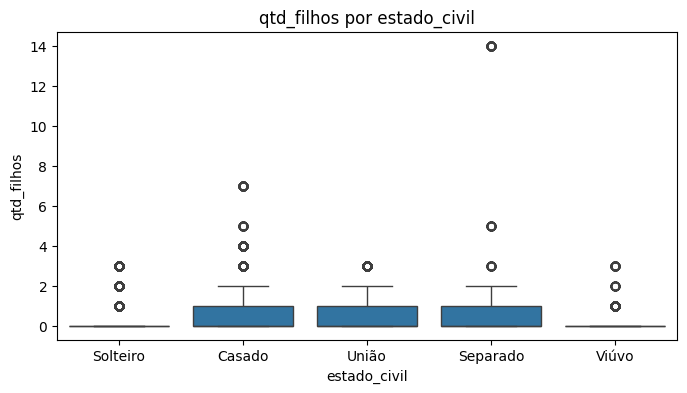

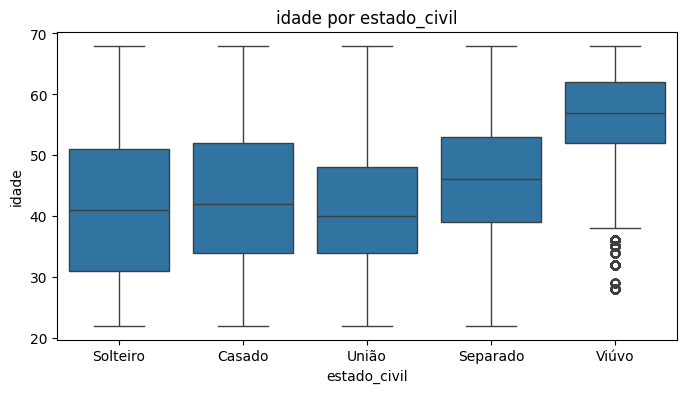

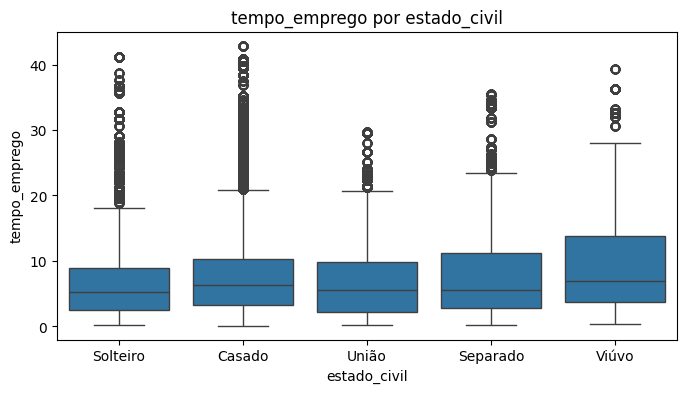

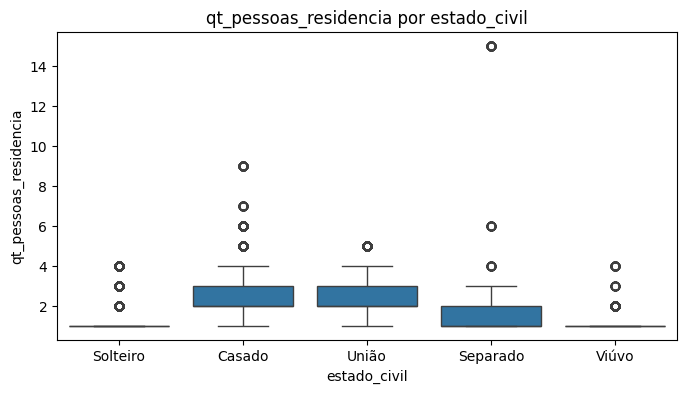

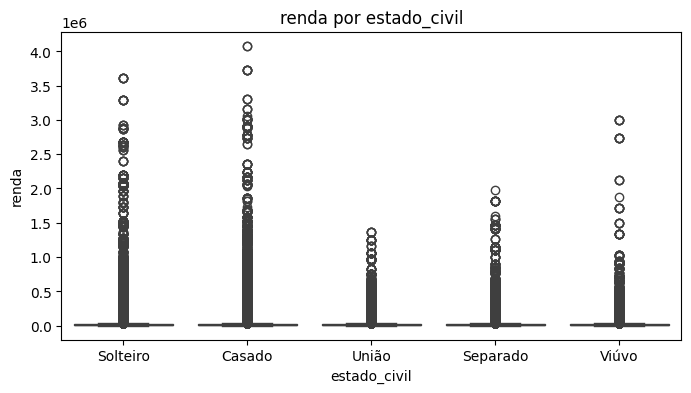

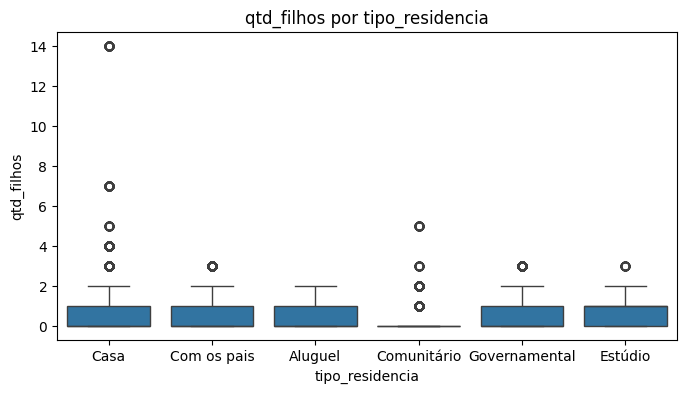

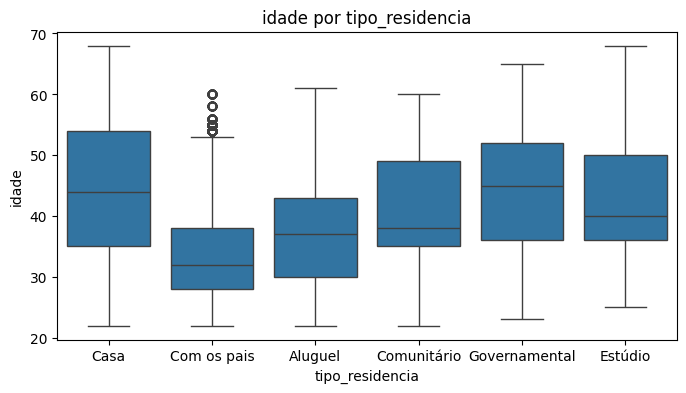

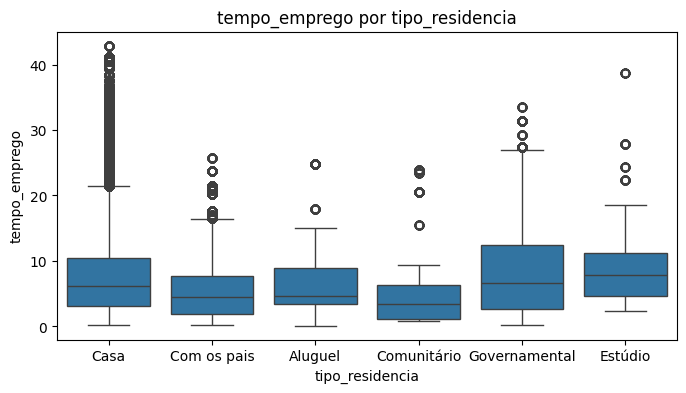

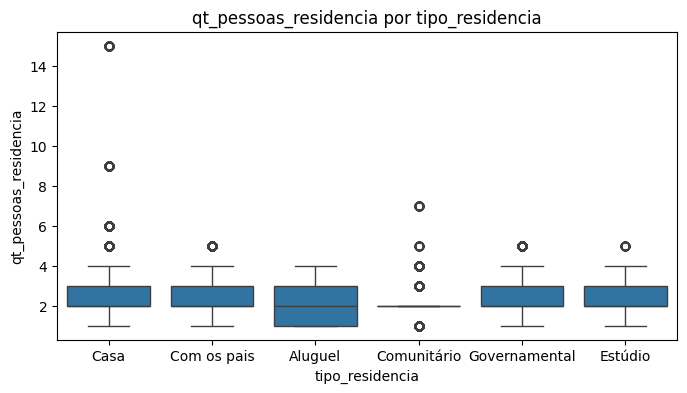

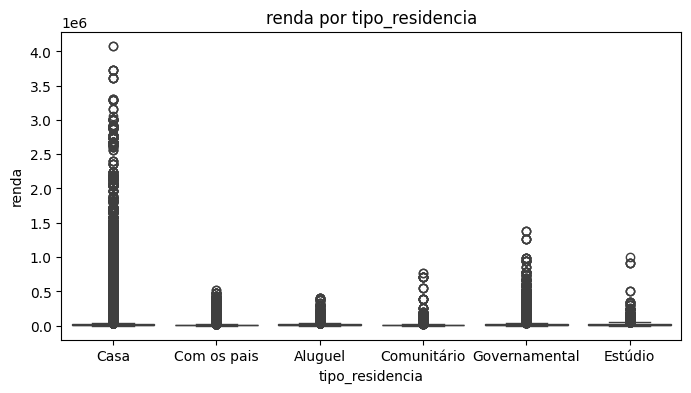

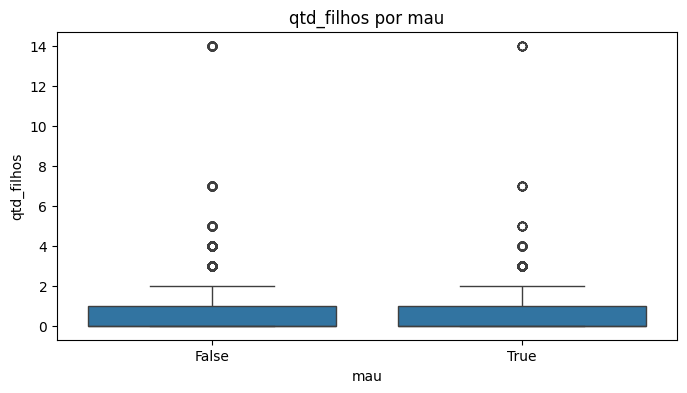

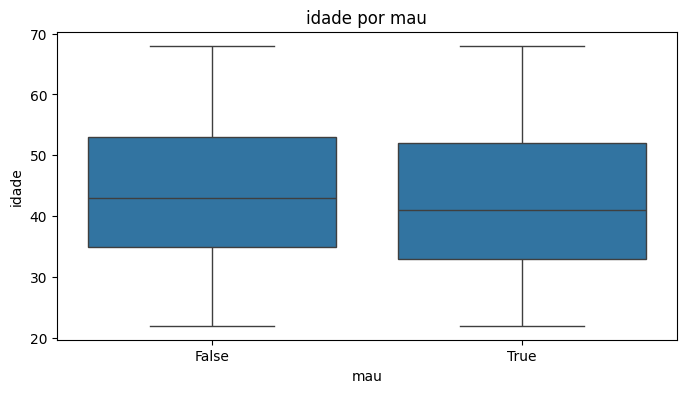

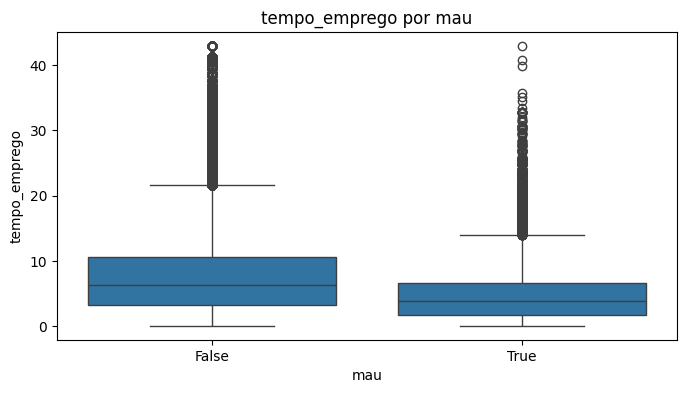

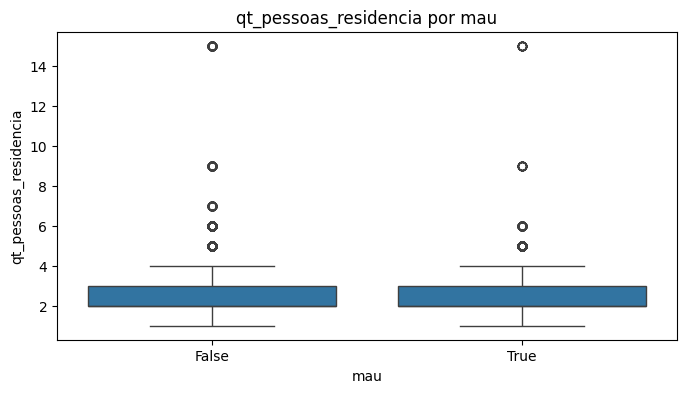

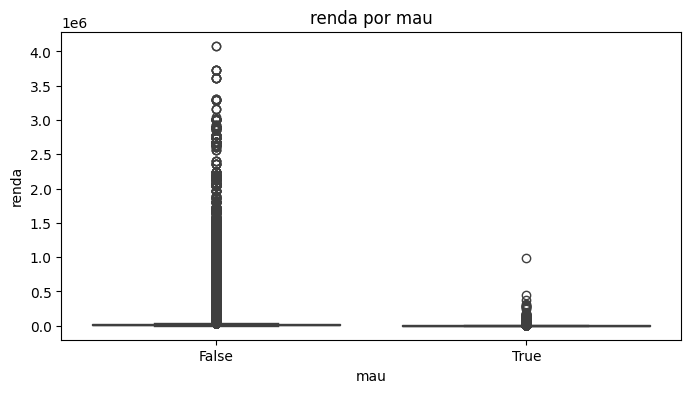

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Separar variáveis qualitativas e quantitativas
qualitativas = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'mau']
quantitativas = ['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']

# 1. Análise entre variáveis qualitativas
print("Tabelas de contingência entre variáveis qualitativas:")
for i in range(len(qualitativas)):
    for j in range(i + 1, len(qualitativas)):
        col1, col2 = qualitativas[i], qualitativas[j]
        print(f"\nRelação entre {col1} e {col2}:")
        print(pd.crosstab(df[col1], df[col2], normalize='index') * 100)

# 2. Análise entre variáveis quantitativas
print("\nCorrelação entre variáveis quantitativas:")
print(df[quantitativas].corr())

# Gráficos de dispersão entre variáveis quantitativas
sns.pairplot(df[quantitativas])
plt.show()

# 3. Análise entre variáveis qualitativas e quantitativas
print("\nEstatísticas descritivas de variáveis quantitativas agrupadas por variáveis qualitativas:")
for qual in qualitativas:
    print(f"\nAgrupando por {qual}:")
    print(df.groupby(qual)[quantitativas].describe())

# Boxplots para visualizar distribuições
for qual in qualitativas:
    for quant in quantitativas:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=qual, y=quant, data=df)
        plt.title(f"{quant} por {qual}")
        plt.show()


## Desenvolvimento do modelo

Desenvolva um modelo de *credit scoring* através de uma regressão logística.

- Trate valores missings e outliers
- Trate 'zeros estruturais'
- Faça agrupamentos de categorias conforme vimos em aula
- Proponha uma equação preditiva para 'mau'
- Caso hajam categorias não significantes, justifique

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
import statsmodels.api as sm

print(df.isnull().sum())

# Preencher valores ausentes com a mediana (para variáveis numéricas)
df.fillna(df.median(numeric_only=True), inplace=True)

# Preencher valores ausentes categóricos com a moda
for col in df.select_dtypes(include='object'):
    df[col].fillna(df[col].mode()[0], inplace=True)

data_ref                 0
index                    0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
mau                      0
dtype: int64


<ipython-input-5-64f63712bd73>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
# Remoção de outliers utilizando o intervalo interquartil (IQR)
for col in ['idade', 'tempo_emprego', 'renda']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

df['renda'] = df['renda'].replace(0, df['renda'].median())

In [ ]:
# Agrupando 'educacao'
df['educacao'] = df['educacao'].replace({
    'Médio': 'Fundamental/Médio',
    'Superior incompleto': 'Superior',
    'Superior completo': 'Superior'
})

# Agrupando 'estado_civil'
df['estado_civil'] = df['estado_civil'].replace({
    'Casado': 'Casado/União estável',
    'União estável': 'Casado/União estável',
    'Divorciado': 'Separado/Divorciado'
})

# Criar variável binária para posse de bens
df['posse_bens'] = np.where((df['posse_de_veiculo'] == 'S') | (df['posse_de_imovel'] == 'S'), 1, 0)

# Codificação de variáveis categóricas
df = pd.get_dummies(df, drop_first=True)

In [ ]:
# Separar variáveis independentes e dependente
X = df.drop(['mau', 'data_ref', 'index'], axis=1)  # Remova colunas irrelevantes
y = df['mau']

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ajustar o modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# Predições
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Avaliação do modelo
print(classification_report(y_test, y_pred))
print(f"AUC: {roc_auc_score(y_test, y_proba)}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

              precision    recall  f1-score   support

       False       0.92      1.00      0.96    207295
        True       0.00      0.00      0.00     17705

    accuracy                           0.92    225000
   macro avg       0.46      0.50      0.48    225000
weighted avg       0.85      0.92      0.88    225000

AUC: 0.7722302099271354


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Avaliação do modelo

Avalie o poder discriminante do modelo pelo menos avaliando acurácia, KS e Gini.

Avalie estas métricas nas bases de desenvolvimento e *out of time*.

In [ ]:
from sklearn.metrics import accuracy_score

# Acurácia na base de treino
train_accuracy = accuracy_score(y_train, model.predict(X_train))
print(f"Acurácia (Treino): {train_accuracy:.2f}")

# Acurácia na base de teste
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia (Teste): {test_accuracy:.2f}")


Acurácia (Treino): 0.92
Acurácia (Teste): 0.92


In [ ]:
def ks_metric(y_true, y_proba):
    from sklearn.metrics import roc_curve
    fpr, tpr, thresholds = roc_curve(y_true, y_proba)
    ks = max(tpr - fpr)
    return ks

# KS na base de treino
train_ks = ks_metric(y_train, model.predict_proba(X_train)[:, 1])
print(f"KS (Treino): {train_ks:.2f}")

# KS na base de teste
test_ks = ks_metric(y_test, y_proba)
print(f"KS (Teste): {test_ks:.2f}")

KS (Treino): 0.41
KS (Teste): 0.41


In [ ]:
# Cálculo do Gini
def gini_metric(y_true, y_proba):
    auc = roc_auc_score(y_true, y_proba)
    return 2 * auc - 1

# Gini na base de treino
train_gini = gini_metric(y_train, model.predict_proba(X_train)[:, 1])
print(f"Gini (Treino): {train_gini:.2f}")

# Gini na base de teste
test_gini = gini_metric(y_test, y_proba)
print(f"Gini (Teste): {test_gini:.2f}")

Gini (Treino): 0.54
Gini (Teste): 0.54


In [ ]:
oot_data = df[df['data_ref'] > '2015-06-01']  # Período fora do usado no treinamento

# Separar X e y
X_oot = oot_data.drop(['mau', 'data_ref', 'index'], axis=1)
y_oot = oot_data['mau']

# Previsões na base OOT
y_oot_proba = model.predict_proba(X_oot)[:, 1]
y_oot_pred = model.predict(X_oot)

# Avaliar métricas
oot_accuracy = accuracy_score(y_oot, y_oot_pred)
oot_ks = ks_metric(y_oot, y_oot_proba)
oot_gini = gini_metric(y_oot, y_oot_proba)

print(f"Acurácia (OOT): {oot_accuracy:.2f}")
print(f"KS (OOT): {oot_ks:.2f}")
print(f"Gini (OOT): {oot_gini:.2f}")

Acurácia (OOT): 0.92
KS (OOT): 0.42
Gini (OOT): 0.55


# a - Criar um pipeline utilizando o sklearn pipeline para o preprocessamento

## Pré processamento

### Substituição de nulos (nans)

Existe nulos na base? é dado numérico ou categórico? qual o valor de substituição? média? valor mais frequente? etc

### Remoção de outliers

Como identificar outlier? Substituir o outlier por algum valor? Remover a linha?

### Seleção de variáveis

Qual tipo de técnica? Boruta? Feature importance?

### Redução de dimensionalidade (PCA)

Aplicar PCA para reduzir a dimensionalidade para 5

### Criação de dummies

Aplicar o get_dummies() ou onehotencoder() para transformar colunas catégoricas do dataframe em colunas de 0 e 1.
- sexo
- posse_de_veiculo
- posse_de_imovel
- tipo_renda
- educacao
- estado_civil
- tipo_residencia

### Pipeline

Crie um pipeline contendo essas funções.

preprocessamento()
- substituicao de nulos
- remoção outliers
- PCA
- Criação de dummy de pelo menos 1 variável (posse_de_veiculo)

In [ ]:
!pip install boruta

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 2.3 MB/s eta 0:00:00


,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
0,2015-01-01,5733,F,N,N,0,Empresário,Médio,Solteiro,Casa,43,6.873973,1.0,2515.39,False
1,2015-01-01,727,F,S,S,0,Assalariado,Médio,Casado,Casa,35,4.526027,2.0,3180.19,False
2,2015-01-01,6374,F,N,N,2,Assalariado,Médio,Casado,Casa,31,0.243836,4.0,1582.29,False
3,2015-01-01,9566,F,N,N,0,Assalariado,Médio,Casado,Casa,54,12.772603,2.0,13721.17,False
4,2015-01-01,9502,F,S,N,0,Assalariado,Superior incompleto,Solteiro,Casa,31,8.432877,1.0,2891.08,False


In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.base import BaseEstimator, TransformerMixin

# Função para remover outliers usando IQR
def remove_outliers(df, columns, threshold=1.5):
    mask = pd.Series(True, index=df.index)
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr
        mask &= (df[col] >= lower_bound) & (df[col] <= upper_bound)
    return mask

# Custom transformer para a remoção de outliers
class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None, threshold=1.5):
        self.columns = columns
        self.threshold = threshold

    def fit(self, X, y=None):
        if self.columns is None:
            self.columns = X.select_dtypes(include=[np.number]).columns.tolist()
        return self

    def transform(self, X, y=None):
        X_df = pd.DataFrame(X)
        mask = remove_outliers(X_df, self.columns, self.threshold)
        if y is not None:
            return X_df[mask].reset_index(drop=True), y[mask].reset_index(drop=True)
        return X_df[mask].reset_index(drop=True)

    def fit_transform(self, X, y=None):
        self.fit(X, y)
        return self.transform(X, y)

# Função para selecionar variáveis importantes usando Boruta
class BorutaFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, estimator, n_estimators='auto', max_iter=100):
        self.estimator = estimator
        self.n_estimators = n_estimators
        self.max_iter = max_iter

    def fit(self, X, y):
        # Garantir que X e y sejam arrays numpy
        X = np.array(X) if not isinstance(X, np.ndarray) else X
        y = np.array(y) if not isinstance(y, np.ndarray) else y

        rf = RandomForestClassifier(n_estimators=self.n_estimators, random_state=42)
        boruta = BorutaPy(rf, n_estimators=self.n_estimators, max_iter=self.max_iter, random_state=42)
        boruta.fit(X, y)
        self.support_ = boruta.support_
        self.ranking_ = boruta.ranking_
        return self

    def transform(self, X):
        X = np.array(X) if not isinstance(X, np.ndarray) else X
        return X[:, self.support_]

# Custom transformer para ajustar o PCA dinamicamente
class DynamicPCA(BaseEstimator, TransformerMixin):
    def __init__(self, n_components=5):
        self.n_components = n_components
        self.pca = None

    def fit(self, X, y=None):
        # Ajustar dinamicamente o número de componentes com base no número de colunas
        n_features = X.shape[1]
        if n_features > 1:
            self.pca = PCA(n_components=min(self.n_components, n_features))
            self.pca.fit(X)
        return self

    def transform(self, X):
        if self.pca:
            return self.pca.transform(X)
        return X  # Retorna X sem transformação se PCA não for aplicável

# Carregar os dados
data = pd.read_feather('credit_scoring.ftr')

# Identificar colunas categóricas e numéricas dinamicamente
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()

# Pré-processamento de dados categóricos (OneHotEncoder) e numéricos (imputer + scaler)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Combinar transformações em um ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Dividir dados em X e y
X = data.drop(columns=["mau", "data_ref"])
y = data["mau"].astype(int)  # Certifique-se de que a variável alvo seja numérica

# Sincronizar X e y durante a remoção de outliers
outlier_remover = OutlierRemover(columns=numerical_cols)
X, y = outlier_remover.fit_transform(X, y)

# Construir o pipeline com ajuste dinâmico de PCA
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('boruta_selector', BorutaFeatureSelector(estimator=RandomForestClassifier(), max_iter=50)),
    ('dynamic_pca', DynamicPCA(n_components=5))  # PCA dinâmico
])

# Aplicar o pipeline (após a remoção de outliers)
X_transformed = pipeline.fit_transform(X, y)

# Resultado final
print("Shape após transformação:", X_transformed.shape)


Shape após transformação: (531682, 1)


# b - Pycaret na base de dados

Utilize o pycaret para pre processar os dados e rodar o modelo **lightgbm**. Faça todos os passos a passos da aula e gere os gráficos finais. E o pipeline de toda a transformação.



In [ ]:
import pandas as pd

df = pd.read_feather('credit_scoring.ftr')
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
0,2015-01-01,5733,F,N,N,0,Empresário,Médio,Solteiro,Casa,43,6.873973,1.0,2515.39,False
1,2015-01-01,727,F,S,S,0,Assalariado,Médio,Casado,Casa,35,4.526027,2.0,3180.19,False
2,2015-01-01,6374,F,N,N,2,Assalariado,Médio,Casado,Casa,31,0.243836,4.0,1582.29,False
3,2015-01-01,9566,F,N,N,0,Assalariado,Médio,Casado,Casa,54,12.772603,2.0,13721.17,False
4,2015-01-01,9502,F,S,N,0,Assalariado,Superior incompleto,Solteiro,Casa,31,8.432877,1.0,2891.08,False


In [ ]:
!pip install pycaret

[LightGBM] [Info] Number of positive: 553086, number of negative: 553086
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.233246 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6454
[LightGBM] [Info] Number of data points in the train set: 1106172, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


,Description,Value
0,Session id,42
1,Target,mau
2,Target type,Binary
3,Original data shape,"(750000, 13)"
4,Transformed data shape,"(1256172, 3)"
5,Transformed train set shape,"(1106172, 3)"
6,Transformed test set shape,"(150000, 3)"
7,Numeric features,5
8,Categorical features,7
9,Rows with missing values,16.8%


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8605,0.7793,0.4179,0.2580,0.3190,0.2461,0.2550
1,0.8591,0.7806,0.4277,0.2581,0.3219,0.2486,0.2585
2,0.8620,0.7797,0.4098,0.2586,0.3171,0.2447,0.2527
3,0.8577,0.7750,0.4075,0.2493,0.3094,0.2352,0.2440
4,0.8572,0.7791,0.4278,0.2543,0.3190,0.2450,0.2553
5,0.8610,0.7812,0.4099,0.2566,0.3157,0.2428,0.2511
6,0.8584,0.7815,0.4191,0.2540,0.3163,0.2426,0.2521
7,0.8581,0.7845,0.4394,0.2595,0.3263,0.2528,0.2638
8,0.8590,0.7766,0.4072,0.2517,0.3111,0.2374,0.2459


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8753,0.7765,0.3476,0.2695,0.3036,0.2363,0.2386
1,0.8744,0.7791,0.3662,0.2734,0.3131,0.2455,0.2487
2,0.8766,0.7759,0.3502,0.2739,0.3074,0.2407,0.2429
3,0.8725,0.7720,0.3414,0.2600,0.2952,0.2265,0.2291
4,0.8734,0.7757,0.3622,0.2696,0.3091,0.2411,0.2443
5,0.8756,0.7772,0.3470,0.2699,0.3037,0.2365,0.2388
6,0.8734,0.7776,0.3575,0.2680,0.3064,0.2383,0.2413
7,0.8763,0.7803,0.3662,0.2785,0.3164,0.2498,0.2526
8,0.8743,0.7732,0.3392,0.2637,0.2967,0.2288,0.2310


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


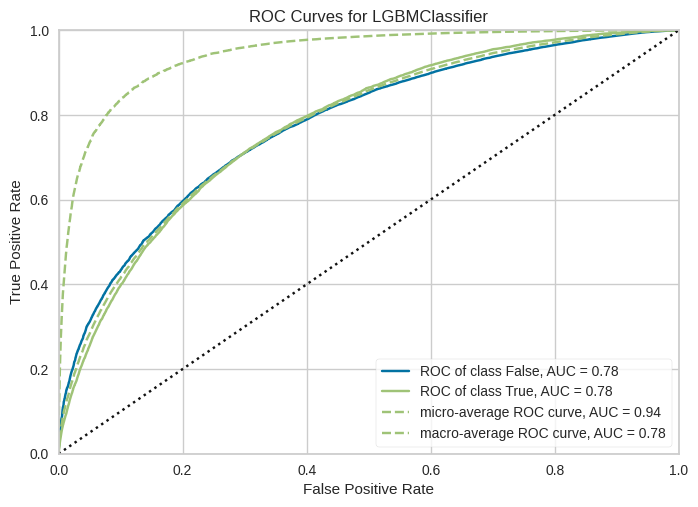

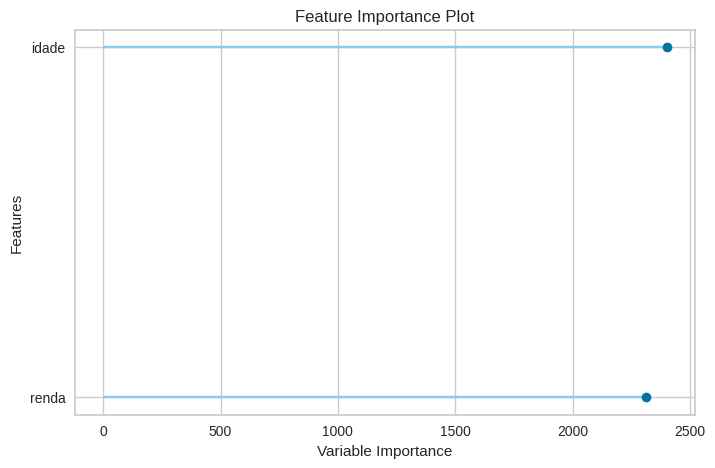

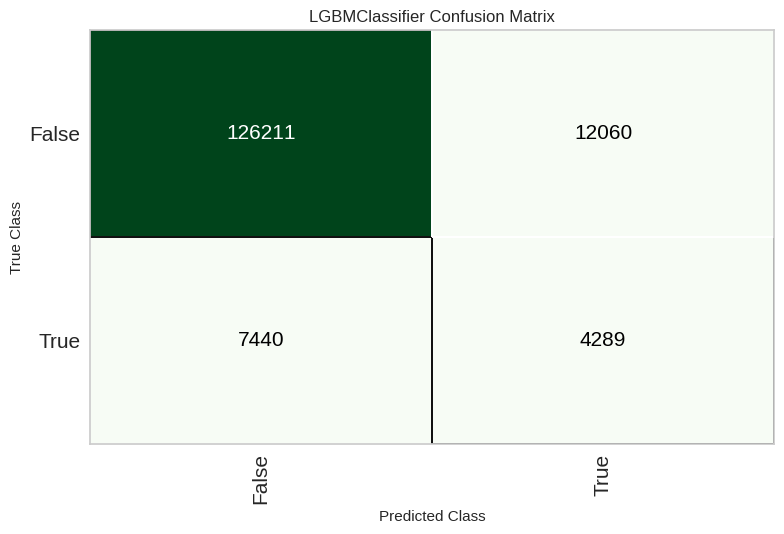

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8700,0.7760,0.3657,0.2623,0.3055,0.2359,0.2399


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


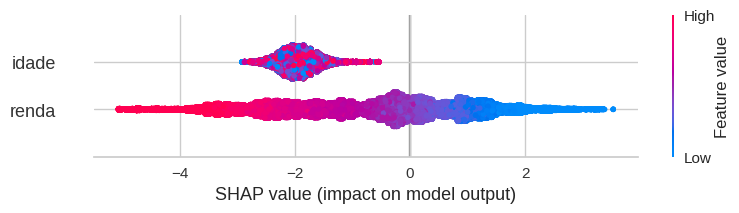

Transformation Pipeline and Model Successfully Saved
✅ Modelo treinado e salvo com sucesso!


In [ ]:
# Importação das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import unicodedata
from pycaret.classification import *

# Carregar os dados
df = pd.read_feather('credit_scoring.ftr')

# Removendo colunas irrelevantes
df.drop(columns=['data_ref', 'index'], inplace=True)

# Função para remover acentos e substituir espaços por underlines
def normalize_text(text):
    if isinstance(text, str):
        text = unicodedata.normalize("NFKD", text).encode("ASCII", "ignore").decode("ASCII")
        return text.replace(" ", "_")
    return text

# Aplicando a função para normalizar os nomes das colunas
df.columns = [normalize_text(col) for col in df.columns]

# Aplicando a função para normalizar os valores das colunas categóricas
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].apply(normalize_text)

# Configurar PyCaret para pré-processamento e modelagem
clf = setup(
    data=df,
    target='mau',  # Variável alvo
    train_size=0.8,  # 80% treino, 20% teste
    session_id=42,  # Para reprodutibilidade
    normalize=True,  # Normalização dos dados
    feature_selection=True,  # Seleção automática de features
    remove_multicollinearity=True,  # Remover colinearidade
    transformation=True,  # Aplicar transformação para melhorar distribuição
    fix_imbalance=True  # Balanceamento de classes
)

# Treinar o modelo LightGBM
modelo = create_model('lightgbm')

# Ajustar hiperparâmetros do modelo automaticamente
modelo_tuned = tune_model(modelo)

# Avaliação do modelo com gráficos
plot_model(modelo_tuned, plot='auc')  # Curva ROC-AUC
plot_model(modelo_tuned, plot='feature')  # Importância das features
plot_model(modelo_tuned, plot='confusion_matrix')  # Matriz de confusão

# Previsões no conjunto de teste
predictions = predict_model(modelo_tuned)

# Gerar relatório completo
interpret_model(modelo_tuned)  # SHAP para interpretação

# Salvar o pipeline completo para uso futuro
save_model(modelo_tuned, 'modelo_credit_scoring_lgbm')

print("✅ Modelo treinado e salvo com sucesso!")
